# ESE playground

## transpilation

In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, execute, BasicAer
import numpy as np

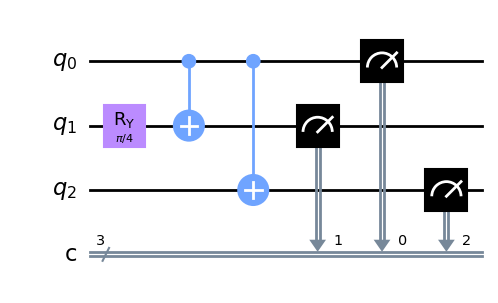

In [2]:
# define simple circuit
qc = QuantumCircuit(3,3)
qc.ry(45/360*2*np.pi,1)
qc.cx(0,1)
qc.cx(0,2)
qc.measure([0,1,2], [0,1,2])
qc.draw('mpl')

In [19]:
# use fake santiago backend
from qiskit.providers.fake_provider import FakeSantiagoV2
santiago = FakeSantiagoV2()
santiago.operations

[Instruction(name='id', num_qubits=1, num_clbits=0, params=[]),
 Instruction(name='rz', num_qubits=1, num_clbits=0, params=[Parameter(λ)]),
 Instruction(name='sx', num_qubits=1, num_clbits=0, params=[]),
 Instruction(name='x', num_qubits=1, num_clbits=0, params=[]),
 Instruction(name='cx', num_qubits=2, num_clbits=0, params=[]),
 Instruction(name='reset', num_qubits=1, num_clbits=0, params=[]),
 Instruction(name='measure', num_qubits=1, num_clbits=1, params=[]),
 Delay(duration=t[unit=dt])]

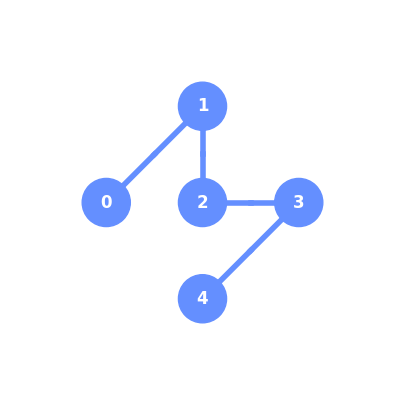

In [20]:
from qiskit.visualization import plot_gate_map

plot_gate_map(santiago)

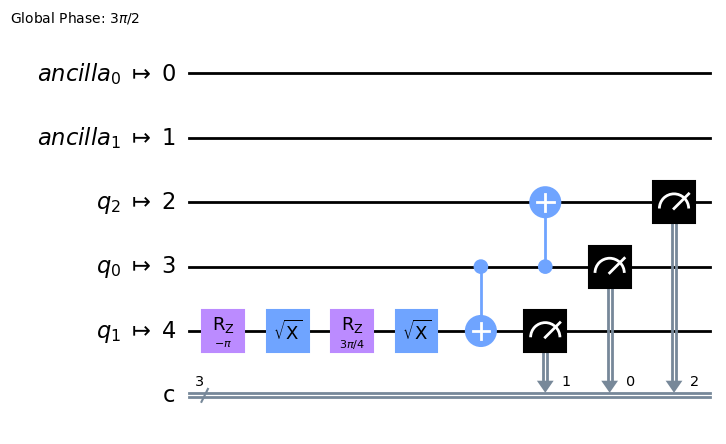

In [21]:
from qiskit import transpile
transpile_qc = transpile(qc, santiago)
transpile_qc.draw('mpl')

## superposition

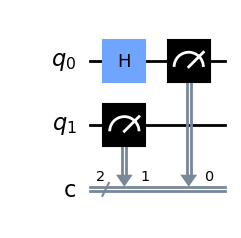

In [5]:
# define simple circuit
qc_coin = QuantumCircuit(2,2)
qc_coin.h(0)
qc_coin.measure([0,1], [0,1])
qc_coin.draw('mpl')

## measuring

In [29]:
import qiskit.quantum_info as qi
from qiskit.providers.aer import QasmSimulator

qc_coin_wo_measurement = qc_coin.remove_final_measurements(inplace=False)

stv1 = qi.Statevector.from_instruction(qc_coin_wo_measurement)
sim = QasmSimulator()
options = {'method': 'statevector'}
execute(qc_coin_wo_measurement, sim, backend_options=options)

stv1.draw('latex', prefix='Statevector1:')

<IPython.core.display.Latex object>

## errors

/home/marc/anaconda3/envs/qiskit_nature/lib/python3.10/site-packages/qiskit/providers/fake_provider/fake_backend.py:354: RuntimeWarning: Aer not found using BasicAer and no noise
  warnings.warn("Aer not found using BasicAer and no noise", RuntimeWarning)


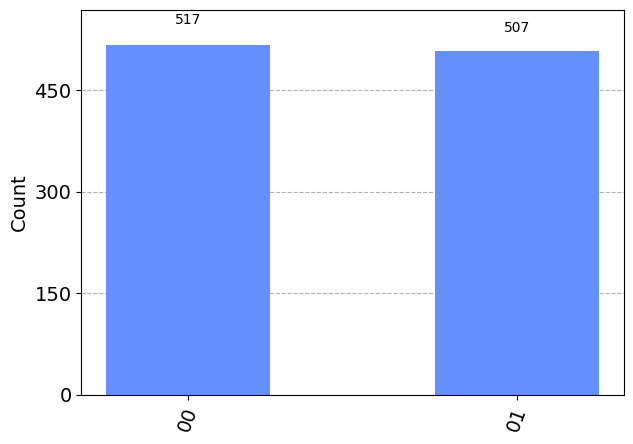

In [30]:
from qiskit.visualization import plot_histogram

job = execute(qc_coin, santiago, shots=1024) #we specify our job, which circuit to execute and how many times
result = job.result() #we extract the results from the job
counts = result.get_counts() #this time, we are not getting the state, but the counts!
plot_histogram(counts) #a new plotting method! this works for counts obviously!